# Comparing Images

In [1]:
import numpy as np
import torch
import torch.nn.functional as F
from torchmetrics.image import StructuralSimilarityIndexMeasure
from PIL import Image
import matplotlib.pyplot as plt

## Common Functions
Updated to use PyTorch's built-in MSE function.

In [2]:
# Function to create a random image
def create_random_image(height=32, width=32, channels=3):     
    # Create a random image tensor
    random_image = torch.rand(channels, height, width)  # 3 channels (RGB), 256x256 pixels
    # Convert the tensor to a NumPy array
    random_image_np = random_image.numpy()
    # Convert the tensor to a PIL image
    random_image_pil = Image.fromarray((random_image_np * 255).astype(np.uint8).transpose(1, 2, 0))
    # Return the PIL image
    return random_image_pil

In [3]:
# Create two random images, compare their MSE, and display them side by side
def display_images_side_by_side(image1, image2):
    
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Display the first image
    axes[0].imshow(image1)
    axes[0].set_title('Image 1')
    axes[0].axis('off')  # Hide axes
    
    # Display the second image
    axes[1].imshow(image2)
    axes[1].set_title('Image 2')
    axes[1].axis('off')  # Hide axes
    
    # Show the plot
    plt.show()

In [4]:
# Function to create SSIM image for two given images
def create_ssim_image(image1, image2):
    # Convert images to tensors with shape (1, C, H, W)
    img1_tensor = torch.tensor(np.array(image1), dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)
    img2_tensor = torch.tensor(np.array(image2), dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)

    # Calculate SSIM and extract the SSIM map
    ssim_value, ssim_map = StructuralSimilarityIndexMeasure(return_full_image=True)(img1_tensor, img2_tensor)

    # Display the SSIM map (average over channels to get a 2D map)
    ssim_map_np = ssim_map.squeeze().numpy()
    if ssim_map_np.ndim == 3 and ssim_map_np.shape[0] == 3:
        ssim_map_2d = ssim_map_np.mean(axis=0)
    else:
        ssim_map_2d = ssim_map_np

    # Return the SSIM map
    return ssim_value, ssim_map_2d

## Compare Images 

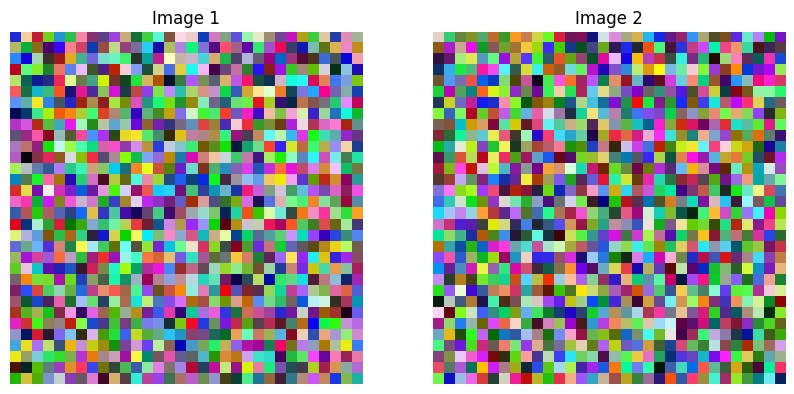

In [5]:
# Create two random images, display them side by side
image1 = create_random_image()
image2 = create_random_image()
display_images_side_by_side(image1, image2)

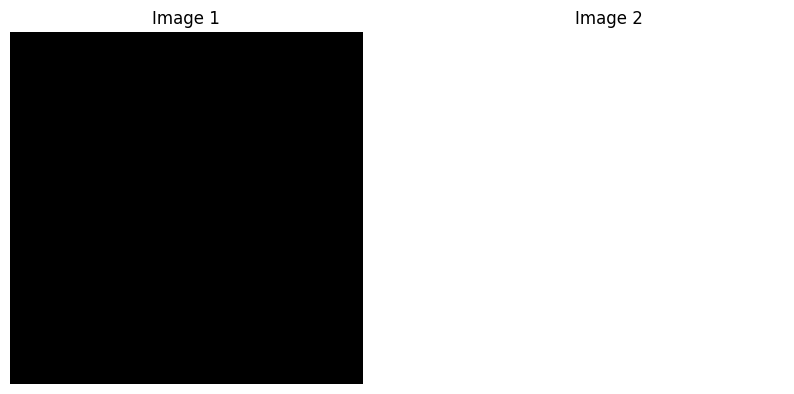

In [6]:
# Create a black image and a white image and then display them side by side
black_image = Image.new('RGB', (32, 32), (0, 0, 0))
white_image = Image.new('RGB', (32, 32), (255, 255, 255))
display_images_side_by_side(black_image, white_image)

In [7]:
# Calculate MSE of two identical images
mse = F.mse_loss(torch.tensor(np.array(image1), dtype=torch.float32) / 255, torch.tensor(np.array(image1), dtype=torch.float32) / 255)
print(f"Mean Squared Error between the two identical images: {mse}")

Mean Squared Error between the two identical images: 0.0


In [8]:
# Calculate MSE of two random images
mse = F.mse_loss(torch.tensor(np.array(image1), dtype=torch.float32) / 255, torch.tensor(np.array(image2), dtype=torch.float32) / 255)
print(f"Mean Squared Error between the two random images: {mse}")

Mean Squared Error between the two random images: 0.171212837100029


In [9]:
# Calculate PSNR for two identical images
mse = F.mse_loss(torch.tensor(np.array(image1), dtype=torch.float32) / 255, torch.tensor(np.array(image1), dtype=torch.float32) / 255)
psnr = 10 * torch.log10(1 / mse)
print(f"Peak Signal-to-Noise Ratio between the two identical images: {psnr.item()}")

Peak Signal-to-Noise Ratio between the two identical images: inf


In [10]:
# Calculate PSNR of two random images
mse = F.mse_loss(torch.tensor(np.array(image1), dtype=torch.float32) / 255, torch.tensor(np.array(image2), dtype=torch.float32) / 255)
psnr = 10 * torch.log10(1 / mse)
print(f"Peak Signal-to-Noise Ratio between the two random images: {psnr.item()}")

Peak Signal-to-Noise Ratio between the two random images: 7.664637088775635


In [11]:
# Calculate SSIM for two identical images

# Convert images to tensors with shape (1, C, H, W)
img1_tensor = torch.tensor(np.array(image1), dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)
img2_tensor = torch.tensor(np.array(image1), dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)

# Calculate SSIM
ssim = StructuralSimilarityIndexMeasure()(img1_tensor, img2_tensor)
print(f"Structural Similarity Index between the two identical images: {ssim.item()}")

Structural Similarity Index between the two identical images: 1.0


In [12]:
# Calculate SSIM of two random images

# Convert images to tensors with shape (1, C, H, W)
img1_tensor = torch.tensor(np.array(image1), dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)
img2_tensor = torch.tensor(np.array(image2), dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)

# Calculate SSIM
ssim = StructuralSimilarityIndexMeasure()(img1_tensor, img2_tensor)
print(f"Structural Similarity Index between the two random images: {ssim.item()}")

Structural Similarity Index between the two random images: -0.008927597664296627


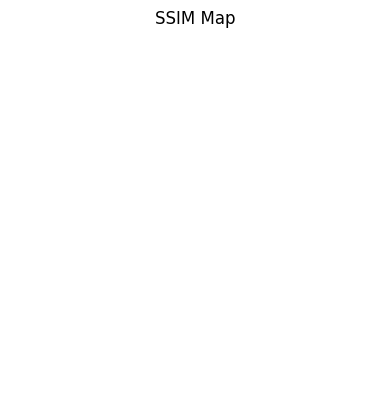

Structural Similarity Index (SSIM) Value of the identical images: 1.0


In [13]:
# Display SSIM map of two identical images

# Create SSIM image for two identical images
ssim_value, ssim_map_2d = create_ssim_image(image1, image1)

# Display the SSIM map
plt.imshow(ssim_map_2d, cmap=plt.cm.gray, vmin=0, vmax=1)
plt.title('SSIM Map')
plt.axis('off')  # Hide axes
plt.show()

# Print the SSIM value
print(f"Structural Similarity Index (SSIM) Value of the identical images: {ssim_value.item()}")

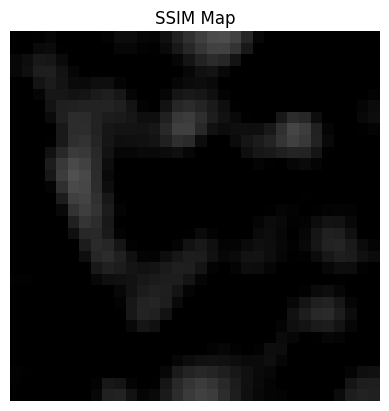

Structural Similarity Index (SSIM) Value: -0.008927597664296627


In [14]:
# SSIM map of two random images

# Create SSIM image for two random images
ssim_value, ssim_map_2d = create_ssim_image(image1, image2)

# Display the SSIM map
plt.imshow(ssim_map_2d, cmap=plt.cm.gray, vmin=0, vmax=1)
plt.title('SSIM Map')
plt.axis('off')  # Hide axes
plt.show()

# Print the SSIM value
print(f"Structural Similarity Index (SSIM) Value: {ssim_value.item()}")

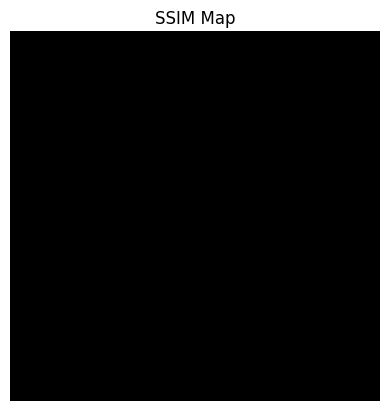

Structural Similarity Index (SSIM) Value: 4.752631411975017e-06


In [15]:
# Calculate SSIM for a blank image and a random image

# Create SSIM image for a blank image and a random image
ssim_value, ssim_map_2d = create_ssim_image(black_image, image1)

# Display the SSIM map
plt.imshow(ssim_map_2d, cmap=plt.cm.gray, vmin=0, vmax=1)
plt.title('SSIM Map')
plt.axis('off')  # Hide axes
plt.show()

# Print the SSIM value
print(f"Structural Similarity Index (SSIM) Value: {ssim_value.item()}")

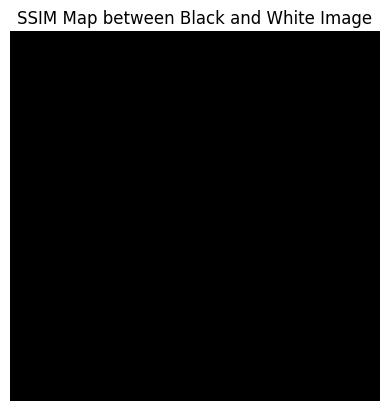

Structural Similarity Index (SSIM) Value between Black and White Image: 0.0


In [16]:
# Create SSIM image for a black image and a white image
ssim_value, ssim_map_2d = create_ssim_image(black_image, white_image)
# Display the SSIM map
plt.imshow(ssim_map_2d, cmap=plt.cm.gray, vmin=0, vmax=1)
plt.title('SSIM Map between Black and White Image')
plt.axis('off')  # Hide axes
plt.show()
# Print the SSIM value
print(f"Structural Similarity Index (SSIM) Value between Black and White Image: {ssim_value.item()}")

Structural Similarity Index between the two black images: nan


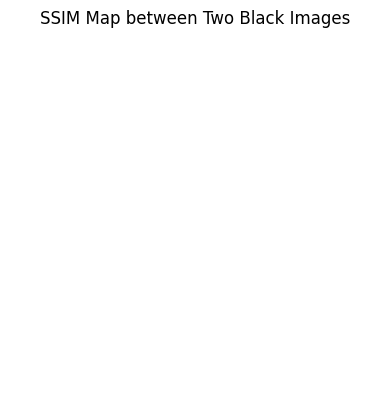

Structural Similarity Index (SSIM) Value between Two Blank Images: nan


In [17]:
# Calculate SSIM for the two black images
black_image1_tensor = torch.tensor(np.array(black_image), dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)
black_image2_tensor = torch.tensor(np.array(black_image), dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)
ssim = StructuralSimilarityIndexMeasure()(black_image1_tensor, black_image2_tensor)
print(f"Structural Similarity Index between the two black images: {ssim.item()}")
# Create SSIM image for the two black images
ssim_value, ssim_map_2d = create_ssim_image(black_image, black_image)
# Display the SSIM map
plt.imshow(ssim_map_2d, cmap=plt.cm.gray, vmin=0, vmax=1)
plt.title('SSIM Map between Two Black Images')
plt.axis('off')  # Hide axes
plt.show()
# Print the SSIM value
print(f"Structural Similarity Index (SSIM) Value between Two Blank Images: {ssim_value.item()}")

Structural Similarity Index between the two white images: 1.0


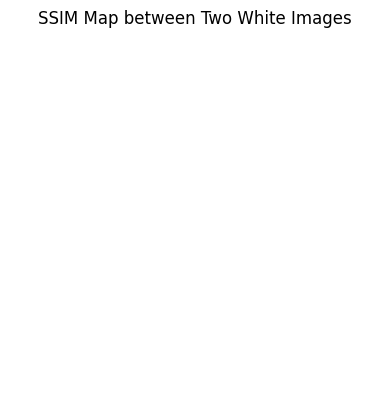

Structural Similarity Index (SSIM) Value between Two White Images: 1.0


In [18]:
# Calculate SSIM for the two white images
white_image1_tensor = torch.tensor(np.array(white_image), dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)
white_image2_tensor = torch.tensor(np.array(white_image), dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)
ssim = StructuralSimilarityIndexMeasure()(white_image1_tensor, white_image2_tensor)
print(f"Structural Similarity Index between the two white images: {ssim.item()}")
# Create SSIM image for the two white images
ssim_value, ssim_map_2d = create_ssim_image(white_image, white_image)
# Display the SSIM map
plt.imshow(ssim_map_2d, cmap=plt.cm.gray, vmin=0, vmax=1)
plt.title('SSIM Map between Two White Images')
plt.axis('off')  # Hide axes
plt.show()
# Print the SSIM value
print(f"Structural Similarity Index (SSIM) Value between Two White Images: {ssim_value.item()}")